In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
data=load_digits()

In [66]:
%matplotlib inline

In [2]:
np.bincount(data.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [3]:
y=data.target.copy()

In [4]:
y[y!=1]=0

In [5]:
np.bincount(y)

array([1615,  182], dtype=int64)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(data.data,y,random_state=0)

In [13]:
svm=SVC(kernel='rbf',C=1).fit(X_train,y_train)

In [14]:
svm.score(X_test,y_test)

0.90888888888888886

In [8]:
from sklearn.dummy import DummyClassifier

In [16]:
dummy=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)

In [17]:
dummy.score(X_test,y_test)

0.9044444444444445

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
dummy_pred=dummy.predict(X_test)

In [22]:
confusion_matrix(y_test,dummy_pred)

array([[407,   0],
       [ 43,   0]])

In [23]:
svm_pred=svm.predict(X_test)

In [24]:
confusion_matrix(y_test,svm_pred)

array([[407,   0],
       [ 41,   2]])

In [26]:
svm_lin=SVC(kernel='linear',C=1).fit(X_train,y_train)
svm_lin_pred=svm_lin.predict(X_test)

In [27]:
confusion_matrix(y_test,svm_lin_pred)

array([[402,   5],
       [  5,  38]])

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree=DecisionTreeClassifier().fit(X_train,y_train)
tree_pred=tree.predict(X_test)

In [30]:
confusion_matrix(y_test,tree_pred)

array([[401,   6],
       [  8,  35]])

In [31]:
from sklearn.metrics import f1_score,precision_score,recall_score

In [34]:
print('f1 score for decision tree is {:.2f}'.format(f1_score(y_test,tree_pred)))

f1 score for decision tree is 0.83


In [35]:
print('precision score for decision tree is {:.2f}'.format(precision_score(y_test,tree_pred)))

precision score for decision tree is 0.85


In [36]:
print('recall score for decision tree is {:.2f}'.format(recall_score(y_test,tree_pred)))

recall score for decision tree is 0.81


In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,tree_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       407
          1       0.85      0.81      0.83        43

avg / total       0.97      0.97      0.97       450



In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression().fit(X_train,y_train)

In [72]:
lr_pred=lr.predict(X_test)

In [56]:
y_scores_lr=lr.decision_function(X_test)

In [58]:
from sklearn.metrics import precision_recall_curve

In [59]:
precision,recall,thresholds=precision_recall_curve(y_test,lr_score)

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

In [61]:
closest_zero

20

In [62]:
closest_zero_p = precision[closest_zero]


In [63]:
closest_zero_p

0.86046511627906974

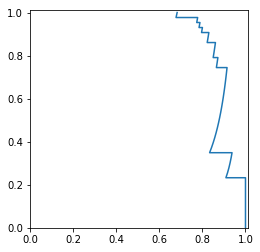

In [70]:
plt.plot(precision,recall)
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.axes().set_aspect('equal')

In [71]:
from sklearn.metrics import roc_curve,roc_auc_score

In [75]:
lr_score=lr.decision_function(X_test)

In [79]:
FP,TP,_=roc_curve(y_test,lr_score)

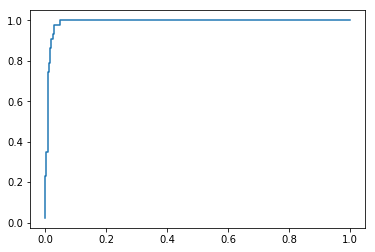

In [80]:
plt.plot(FP,TP)

In [81]:
import seaborn as sns

In [82]:
digits=load_digits()

In [83]:
X=digits.data
y=digits.target

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [85]:
svc_mc=SVC(kernel='linear').fit(X_train,y_train)

In [86]:
svc_mc_pred=svc_mc.predict(X_test)

In [88]:
df_mc=pd.DataFrame(confusion_matrix(y_test,svc_mc_pred),index=[i for i in range(0,10)],columns=[i for i in range(0,10)])

In [89]:
df_mc

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,42,0,0,0,0,0,0,1,0
2,0,0,44,0,0,0,0,0,0,0
3,0,0,0,43,0,0,0,0,1,1
4,0,0,0,0,38,0,0,0,0,0
5,0,0,0,0,0,47,0,0,0,1
6,0,1,0,0,0,0,51,0,0,0
7,0,0,0,0,1,0,0,47,0,0
8,0,3,1,0,0,0,0,0,44,0
9,0,0,0,1,0,1,0,0,1,44


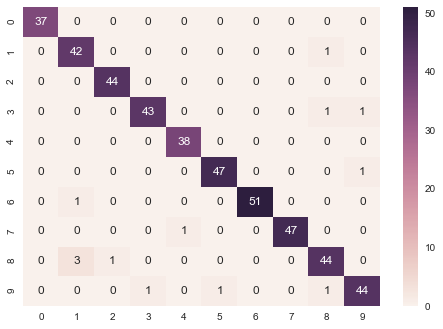

In [91]:
sns.heatmap(df_mc,annot=True)

In [94]:
precision_score(y_test,svc_mc_pred,average='macro')

0.97143115762334076

In [95]:
precision_score(y_test,svc_mc_pred,average='micro')

0.97111111111111115

In [96]:
f1_score(y_test,svc_mc_pred,average='micro')

0.97111111111111115

In [97]:
f1_score(y_test,svc_mc_pred,average='macro')

0.97173733531339523

In [98]:
from sklearn.metrics.scorer import SCORERS

In [100]:
from sklearn.dummy import DummyRegressor

In [101]:
DummyRegressor?

In [102]:
from sklearn.metrics import r2_score

In [104]:
from sklearn.model_selection import cross_val_score

In [111]:
svm=SVC(kernel='linear')

In [113]:
cross_val_score(svm,X,y,cv=5) #note in this step of cross validation, there is no need to prespliting traing and testing sets

array([ 0.96428571,  0.92265193,  0.96657382,  0.96358543,  0.92957746])

In [119]:
cross_val_score(svm,X,y,cv=5)

array([ 0.96428571,  0.92265193,  0.96657382,  0.96358543,  0.92957746])

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [10]:
clf=SVC(kernel='linear')

In [11]:
gridval={'gamma':np.logspace(-3,2,6)}

In [12]:
grid_acc=GridSearchCV(clf,param_grid=gridval)

In [13]:
grid_=grid_acc.fit(X_train,y_train)

In [14]:
grid_.best_params_

{'gamma': 0.001}

In [15]:
grid_.best_score_

0.97253155159613958

In [17]:
grid_auc=GridSearchCV(clf,param_grid=gridval,scoring='roc_auc')

In [19]:
grid_auc_out=grid_auc.fit(X_train,y_train)

In [24]:
grid_pred=grid_auc_out.predict(X_train)

In [25]:
from sklearn.metrics import roc_auc_score

In [21]:
grid_auc_out.best_score_

0.99367302487070752

In [27]:
roc_auc_score(y_train,grid_pred)

1.0